***Loan Application Status Prediction***


This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc.

We have to build a model that can predict whether the loan of the applicant will be approved or not on the basis of the details provided in the dataset.

Loan_ID : Unique Loan ID

Gender : Male/ Female

Married : Applicant married (Y/N)

Dependents : Number of dependents

Education : Applicant Education (Graduate/ Under Graduate)

Self_Employed : Self employed (Y/N)

ApplicantIncome : Applicant income

CoapplicantIncome : Coapplicant income

LoanAmount : Loan amount in thousands of dollars

Loan_Amount_Term : Term of loan in months

Credit_History : credit history meets guidelines yes or no

Property_Area : Urban/ Semi Urban/ Rural

Loan_Status : Loan approved (Y/N) this is the target variable

Target Variable - Loan_Status

In [57]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [9]:
df= pd.read_csv("Downloads/loan_prediction.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


we have 614 rows and 13 columns



***Exploratory Data Analysis***

In [10]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [11]:
#checking column names

df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [12]:
#checking datatypes

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [13]:
#checking data information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In our columns, there is float values and object values

In [17]:
#checking for categorical columns
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_col.append(i)
print(categorical_col)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


In [18]:
#checking for numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print(numerical_col)

['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']


In [19]:
#checking missing values

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [15]:
#checking if any whitespace, 'NA' or '-' exist in dataset
df.isin([' ','NA','-']).sum().any()

False

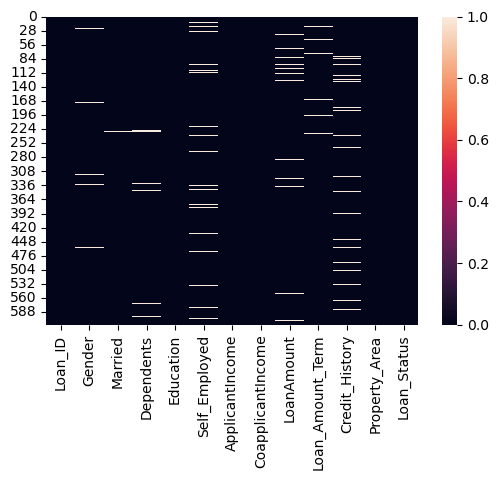

In [16]:
#checking columns values using heatmap

plt.figure(figsize=(6,4))
sns.heatmap(df.isnull())
plt.show()

The white lines in the heat map representd the missing values in the data.



In [24]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [25]:
df.drop("Loan_ID",axis=1,inplace=True)

-The column Loan_ID is the unique ID given to the applicants also it has no significane in the prediction so let's drop this column

-Missing values present in Gender,Married,Dependents -Self_Employed,LoanAmount,Loan_Amount_Term and Credit_History.Will fill them using imputation techniques.

In [26]:
#filling Nan's

df["Gender"] = df["Gender"].fillna(df["Gender"].mode()[0])

df["Married"] = df["Married"].fillna(df["Married"].mode()[0])

df["Dependents"] = df["Dependents"].fillna(df["Dependents"].mode()[0])

df["Self_Employed"] = df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])

df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].mode()[0])

df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode()[0])

df["LoanAmount"] = df["LoanAmount"].fillna(df["LoanAmount"].median())

-In the categorical columns, we filled the missing values with the mode method.

-LoanAmount is continuous, so will fill the null values using median method.

In [27]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<Axes: >

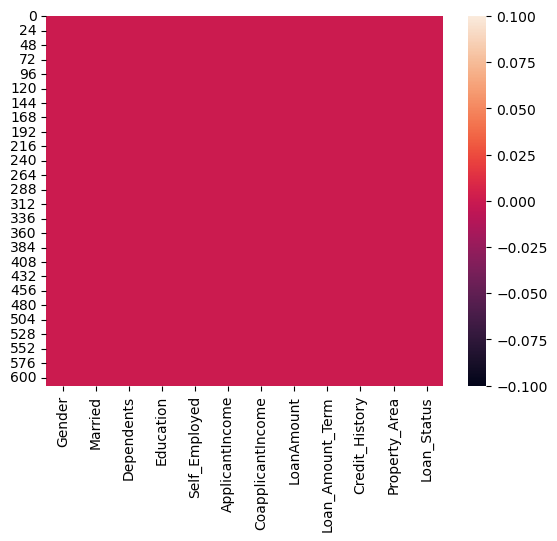

In [29]:
# Let's visualize the null values clearly
sns.heatmap(df.isnull())

-now, no missing values in out data set

In [28]:
# Statistical Summary
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Observations:

-The counts of all the columns are same which means there are no null values present in the dataset.

-The mean value is greater than the median(50%) in ApplicantIncome, CoapplicantIncome, LoanAmount which means they are skewed to right.

-There is a huge difference in max and 75% percentile which means there are outliers present in the dataset



In [31]:
#Checking Skewness
df.skew()

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.743053
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
dtype: float64

there is skewness present in data set

***Data Visualization***

*Univariate analysis*

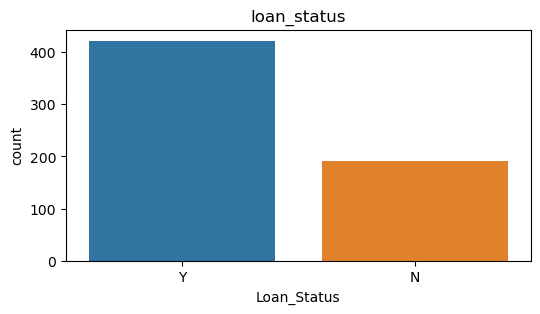

In [33]:
#visualize the target column : capacity_mw


plt.figure(figsize=(6,3))
sns.countplot(x=df.Loan_Status)
plt.title('loan_status')
plt.show()

-more number of loans have been approved.

Male      502
Female    112
Name: Gender, dtype: int64


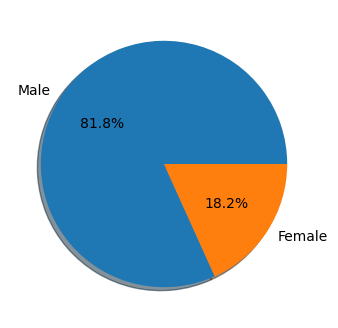

In [38]:
#Visualize the count of applicants Gender
print(df["Gender"].value_counts())
labels='Male','Female'
fig, ax = plt.subplots(figsize=(6,4))
ax.pie(df['Gender'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

- There are more number of Male applicants applying for loan than Female applicants.

Yes    401
No     213
Name: Married, dtype: int64


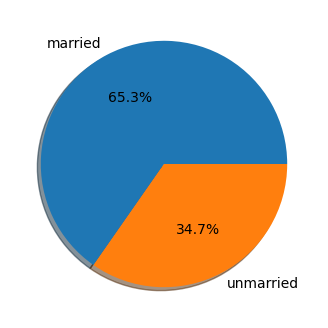

In [39]:
# Visualizing the count of Dependents 

print(df["Married"].value_counts())
labels='married','unmarried'
fig, ax = plt.subplots(figsize=(6,4))
ax.pie(df['Married'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

The number of Married applicants who are applied for loan is higher than the Unmarried applicants.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


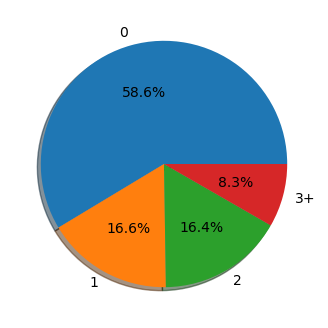

In [41]:
# Visualizing the count of Dependents 
print(df["Dependents"].value_counts())
labels='0','1','2','3+'
fig, ax = plt.subplots(figsize=(6,4))
ax.pie(df['Dependents'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

The applicants who have 0 dependents have high counts and the applicants having more than 3 dependents counts are very less.

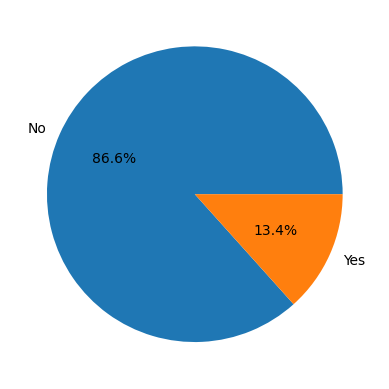

In [43]:
#visualizing self employess

labels='No','Yes'
colors = ["grey", "b"]
fig, ax = plt.subplots()
ax.pie(df['Self_Employed'].value_counts(), labels=labels, autopct='%1.1f%%')
plt.show()

Most of the loan applicants are not self employed.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


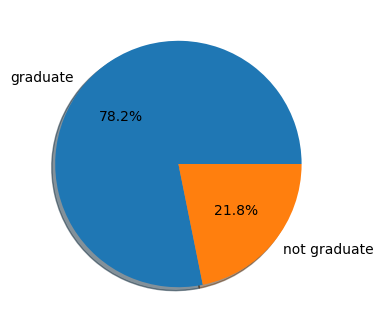

In [44]:
print(df["Education"].value_counts())
labels='graduate','not graduate'
fig, ax = plt.subplots(figsize=(6,4))
ax.pie(df['Education'].value_counts(), labels=labels, autopct='%1.1f%%', shadow=True)
plt.show()

More number of people applied for loan are Graduates and few applicants are Not Graduates.

*Bi-variate Analysis*

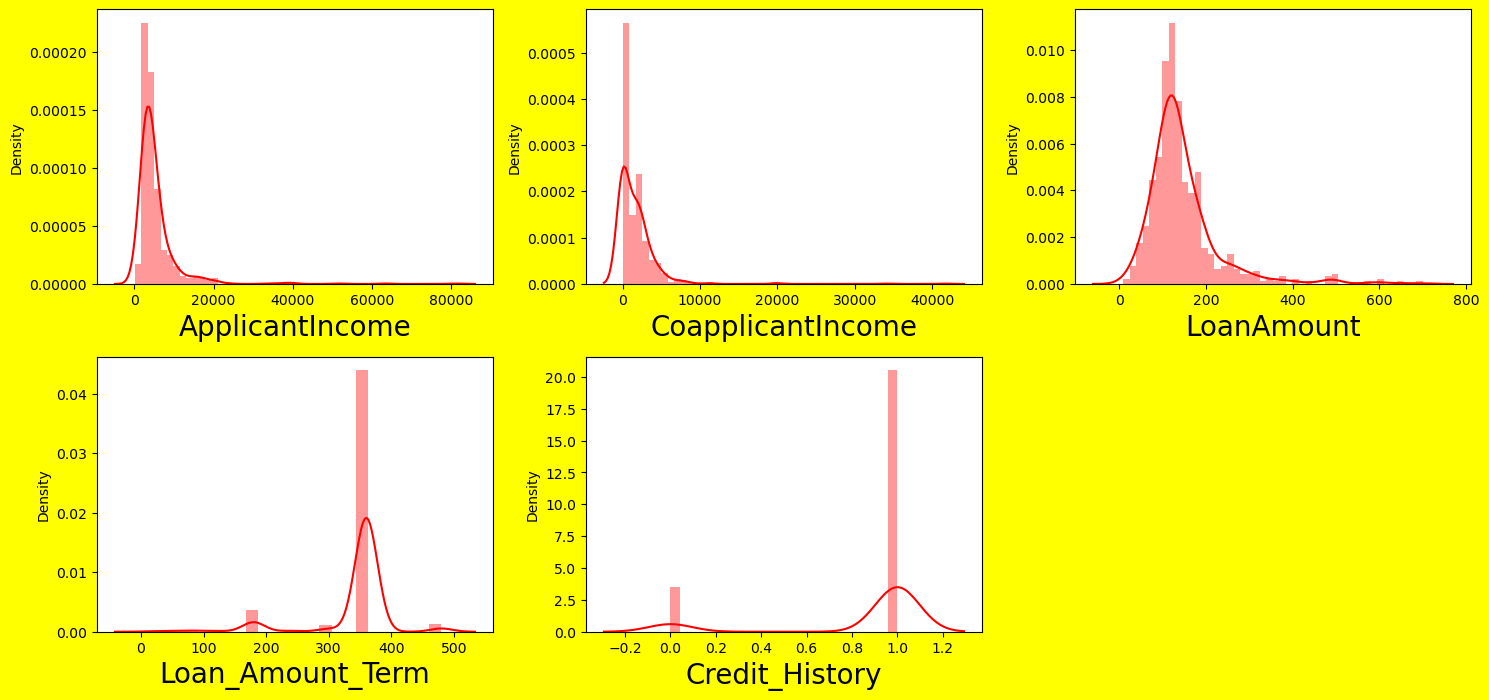

In [51]:
#Checking how the data has been distriubted in each column

plt.figure(figsize=(15,10),facecolor='yellow')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column],color="red")
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

all columns are skewed

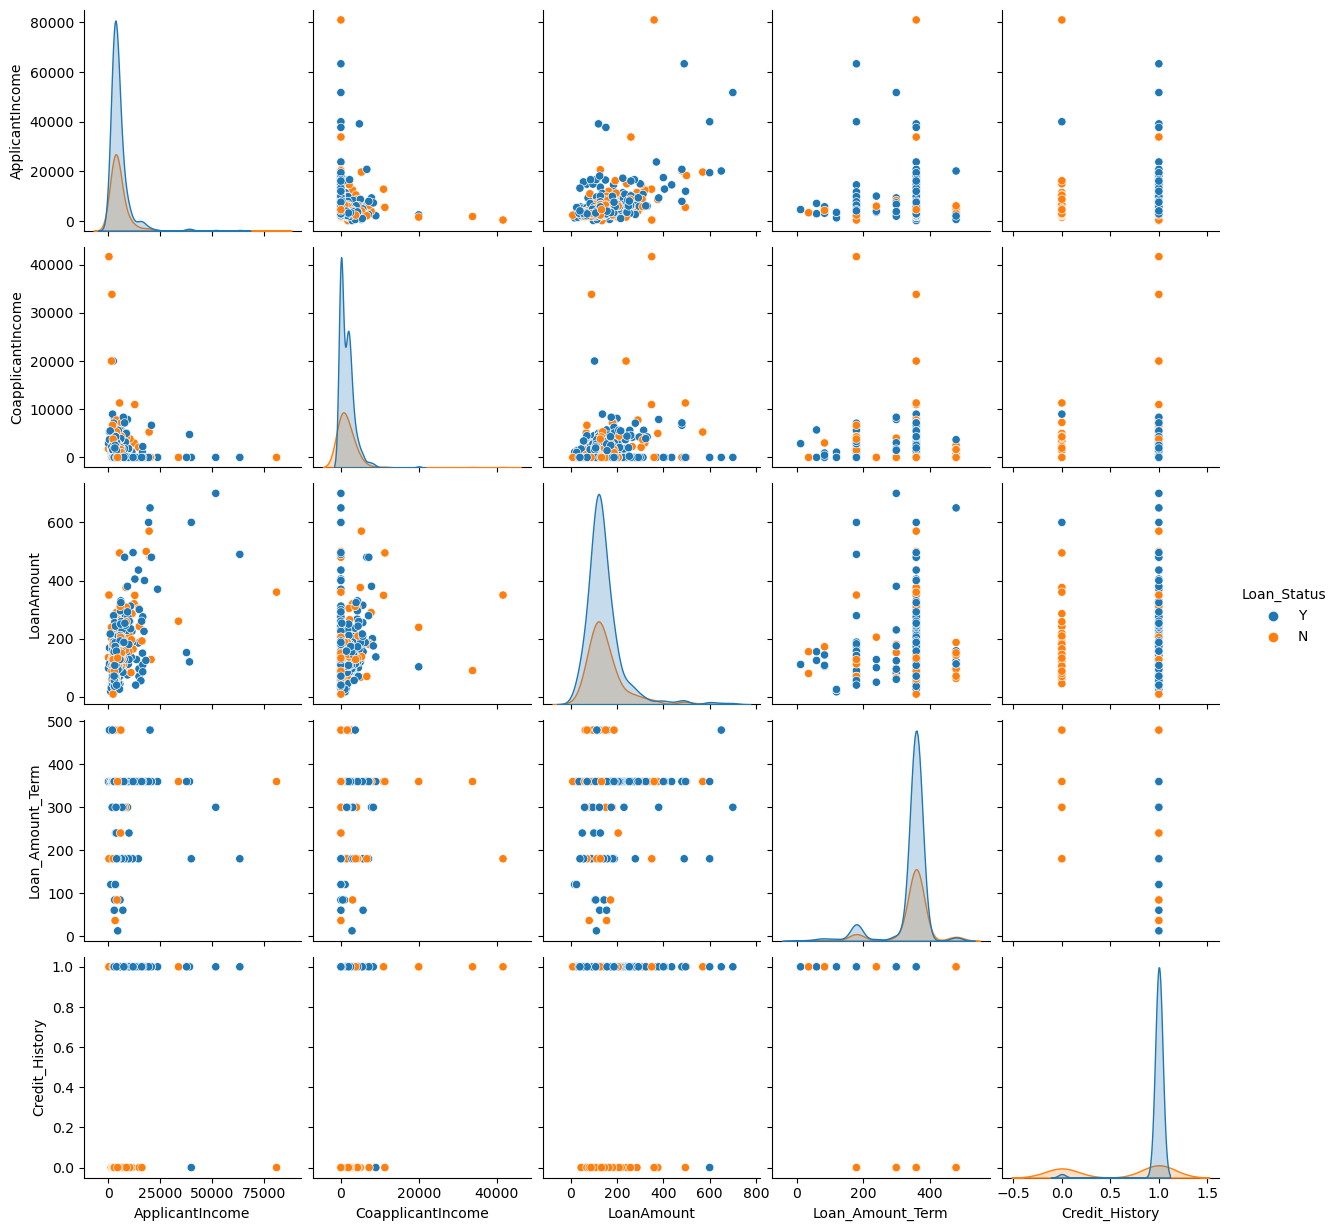

In [58]:
# Checking the pairwise relation in the dataset.
sns.pairplot(df,hue="Loan_Status")

In [59]:
from sklearn.preprocessing import LabelEncoder, StandardScaler, power_transform
from scipy.stats import zscore
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

***Outlier detection and treatment***

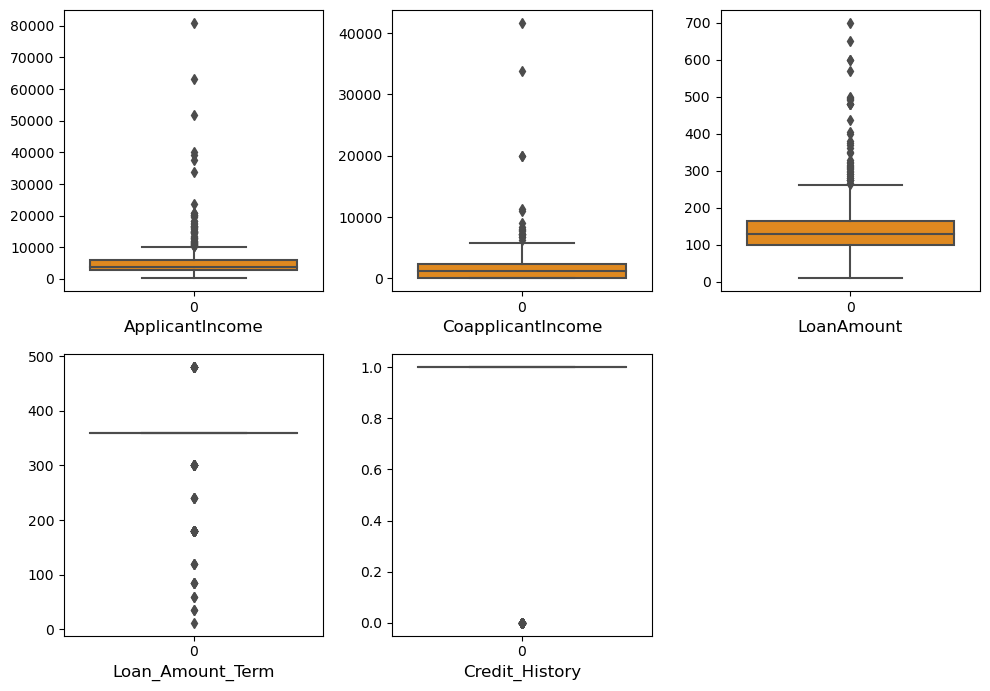

In [62]:
# Identifying the outliers present in numerical columns using boxplo

plt.figure(figsize=(10,10),facecolor='white')
plotnumber=1
for column in numerical_col:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column],color="darkorange")
        plt.xlabel(column,fontsize=12)
    plotnumber+=1
plt.tight_layout()

-Since Credit_History,Loan_Amount_Term is a Categorical column no need to remove outliers.In all other 4 numerical columns we have to remove outliers.

Z-SCORE

In [64]:
# Calculate the z-scores for the specified numerical columns

# numerical columns containing outliers
features = df[['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']]

z = np.abs(zscore(features))

df1 = df[(z < 3).all(axis=1)]
df1.shape

(577, 12)

IQR

In [69]:
df2 = df.copy()
Q1 = df2.quantile(0.25)
Q3= df2.quantile(0.75)
IQR = Q3 - Q1

data = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]
data.shape

(396, 12)

DATALOSS:

In [70]:
# checking the data loss for zscore
data_loss_zscore = (614-577)/614*100
print('using zscore:',data_loss_zscore)

# checking the data loss for IQR
data_loss_IQR = (614-396)/614*100
print('using IQR:',data_loss_IQR)

using zscore: 6.026058631921824
using IQR: 35.50488599348534


chooosing z-score with less data loss

In [72]:
# Checking the skewness
df1.skew()

ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

In [ ]:
The skewness present in all the above columns. Here the columns Credit_History and Loan_Amount_Term have categorical data of integer type so no need to remove skewness in these columns.

In [73]:
# Removing skewness using yeo-johnson  method to get better prediction
skew = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')

In [74]:
df1[skew] = scaler.fit_transform(df1[skew].values)
df1[skew].head()

,ApplicantIncome,CoapplicantIncome,LoanAmount
0,0.681780,-1.122446,0.000771
1,0.234783,0.744117,0.000771
2,-0.527201,-1.122446,-1.437336
3,-0.791972,0.895786,-0.153545
4,0.728848,-1.122446,0.238260


In [75]:
df1.skew()

ApplicantIncome      0.027981
CoapplicantIncome   -0.191876
LoanAmount           0.048425
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
dtype: float64

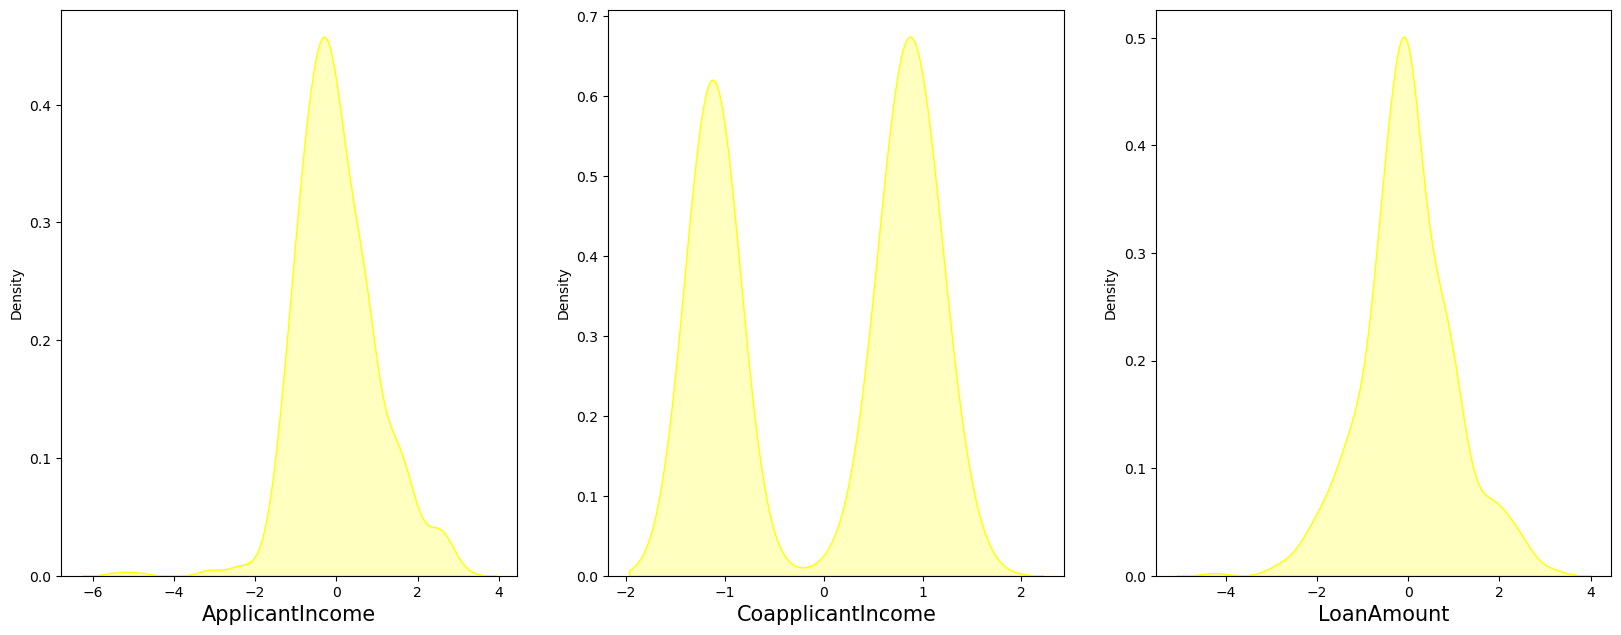

In [78]:
# After removing skewness let's check how the data has been distributed in each column.

plt.figure(figsize=(20,25), facecolor='white')
plotnumber = 1

for column in df1[skew]:
    if plotnumber<=9:
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(df1[column],color='yellow',kde_kws={"shade": True},hist=False)
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.show()

***ENCODING***

In [ ]:
categorical_col = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

In [82]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df1[categorical_col]= df1[categorical_col].apply(LE.fit_transform)

In [83]:
df1[categorical_col]

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
0,1,0,0,0,0,2,1
1,1,1,1,0,0,0,0
2,1,1,0,0,1,2,1
3,1,1,0,1,0,2,1
4,1,0,0,0,0,2,1
...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,1
610,1,1,3,0,0,0,1
611,1,1,1,0,0,2,1
612,1,1,2,0,0,2,1


In [ ]:
The categorical columns has been converted into numerical columns by using label encoding.

***Correlation***

In [84]:
df_cor = df.corr()
df_cor

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565181,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.189218,-0.059383,0.011134
LoanAmount,0.565181,0.189218,1.000000,0.036960,-0.000607
Loan_Amount_Term,-0.046531,-0.059383,0.036960,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.000607,-0.004705,1.000000


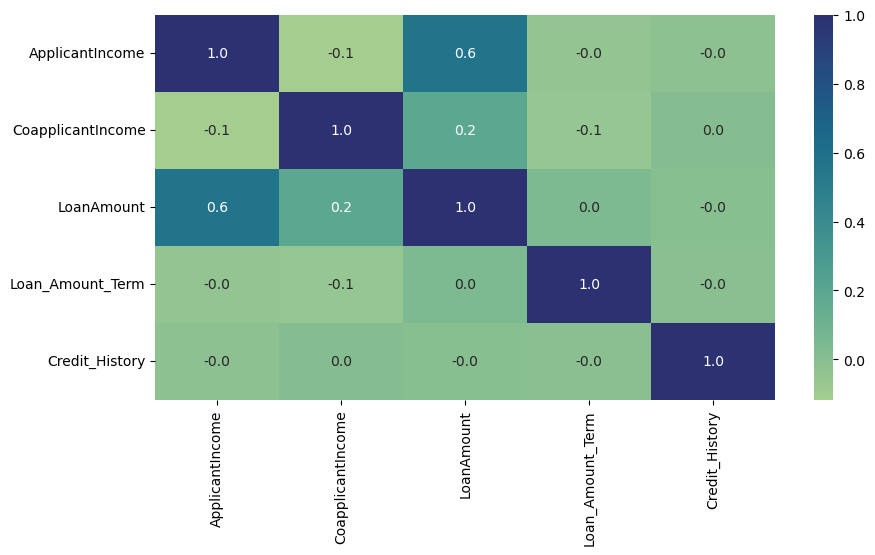

In [90]:
plt.figure(figsize=(10,5))
sns.heatmap(df_cor, annot=True, fmt='.1F', cmap='crest', annot_kws={"size":10})
plt.show()

-The target column Loan_Status is highly positively correlated with the feature Credit_History.

-The other features have very less correlation with the target column.

-Also we can notice there is no multicollinearity issue in the features. 

-Features have moderate level of correlation with each other.

-ApplicantIncome and Gender is very less correlated with the target.

-Dark shades are highly correlated and light shades are very less correlated.

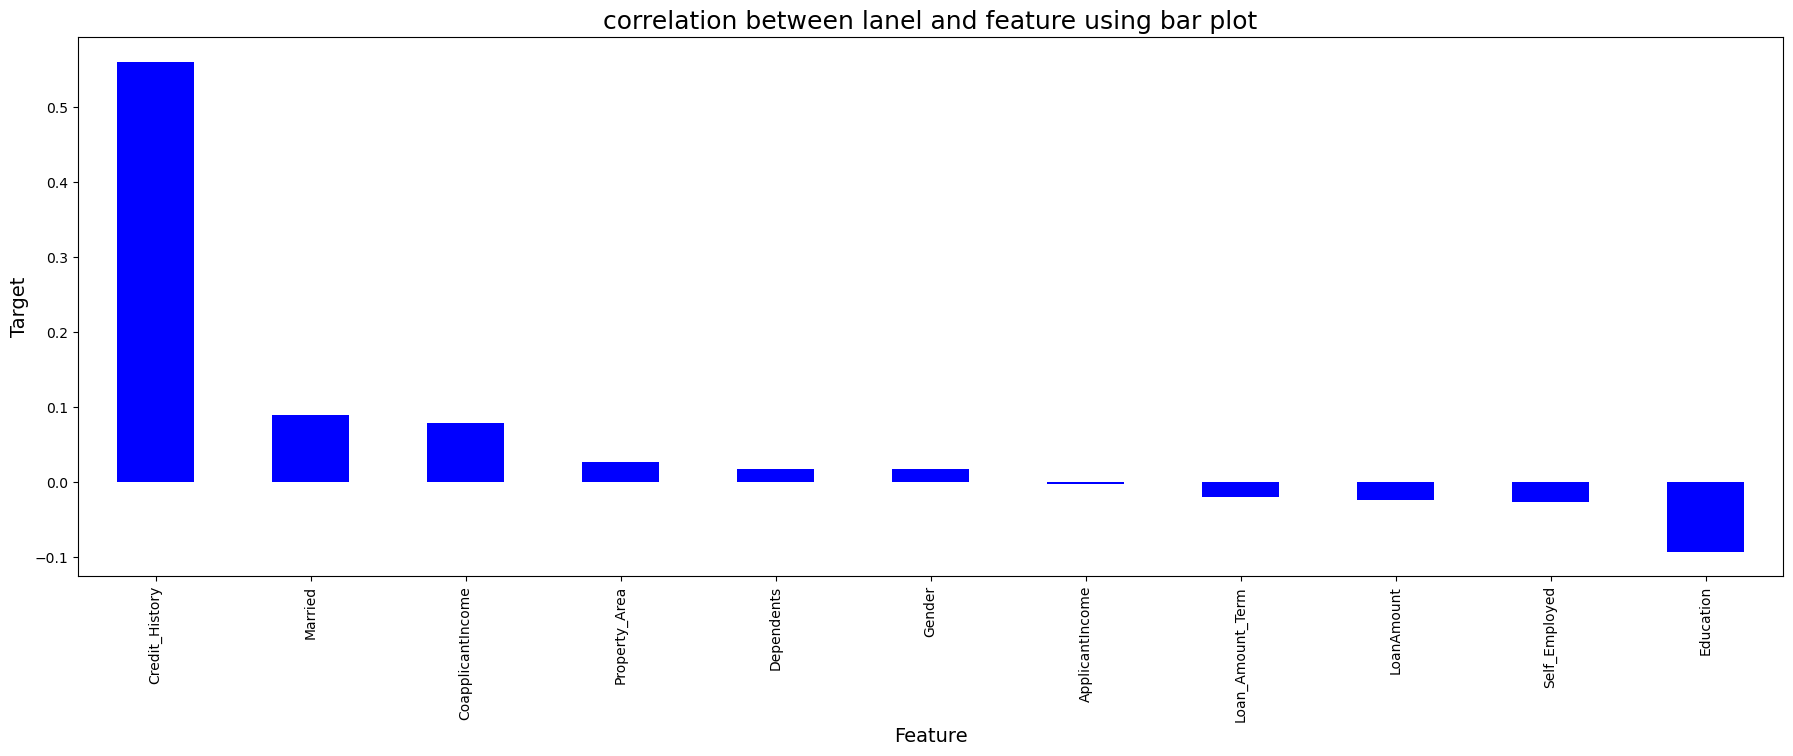

In [93]:
#correlation btw label and features

plt.figure(figsize=(22,7))
df1.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='b')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('Target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [89]:
Here the columns ApplicantIncome has very less correlation with the target so we can drop this column if necessary.

***Data splitting***


In [94]:
# Splitting data in target and dependent feature
x = df1.drop("Loan_Status", axis=1)
y = df1["Loan_Status"]

In [95]:
# Dimension of x
x.shape

(577, 11)

In [96]:
# Dimension of y
y.shape

(577,)

***Feature Scaling***

In [97]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.681780,-1.122446,0.000771,0.230853,0.418513,1.227472
1,0.477137,0.733939,0.282353,-0.541961,-0.380580,0.234783,0.744117,0.000771,0.230853,0.418513,-1.306522
2,0.477137,0.733939,-0.723313,-0.541961,2.627567,-0.527201,-1.122446,-1.437336,0.230853,0.418513,1.227472
3,0.477137,0.733939,-0.723313,1.845150,-0.380580,-0.791972,0.895786,-0.153545,0.230853,0.418513,1.227472
4,0.477137,-1.362511,-0.723313,-0.541961,-0.380580,0.728848,-1.122446,0.238260,0.230853,0.418513,1.227472
...,...,...,...,...,...,...,...,...,...,...,...
572,-2.095835,-1.362511,-0.723313,-0.541961,-0.380580,-0.587375,-1.122446,-1.293791,0.230853,0.418513,-1.306522
573,0.477137,0.733939,2.293686,-0.541961,-0.380580,0.035386,-1.122446,-2.332692,-3.243986,0.418513,-1.306522
574,0.477137,0.733939,0.282353,-0.541961,-0.380580,1.281658,0.173344,1.845015,0.230853,0.418513,1.227472
575,0.477137,0.733939,1.288020,-0.541961,-0.380580,1.164426,-1.122446,0.976055,0.230853,0.418513,1.227472


In [98]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

-Here we can notice the class imbalancing issue so lets use SMOTE to balance the data.

***balancing target variables using oversampling***

In [99]:
# Oversampling the data
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x, y = SM.fit_resample(x,y)

In [100]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

The data is balanced now, Since the highest count of the target is 398 so the data is balanced by oversampling all the classes to the count 398.

In [101]:
# DataFrame after preprocessing and data cleaning
df1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,0.681780,-1.122446,0.000771,360.0,1.0,2,1
1,1,1,1,0,0,0.234783,0.744117,0.000771,360.0,1.0,0,0
2,1,1,0,0,1,-0.527201,-1.122446,-1.437336,360.0,1.0,2,1
3,1,1,0,1,0,-0.791972,0.895786,-0.153545,360.0,1.0,2,1
4,1,0,0,0,0,0.728848,-1.122446,0.238260,360.0,1.0,2,1


***Finding Best Random State and Accuracy***

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    DTC = RandomForestClassifier()
    DTC.fit(x_train, y_train)
    pred = DTC.predict(x_test)
    acc=accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.8828451882845189  on Random_state  29


***Creating train_test split***

In [103]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

***MODEL SELECTION***

In [104]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score

In [105]:
# Checking Accuracy for Decision Tree Classifier
DTC = DecisionTreeClassifier()
DTC.fit(x_train,y_train)

#Prediction
predDTC = DTC.predict(x_test)

print(accuracy_score(y_test, predDTC))
print(confusion_matrix(y_test, predDTC))
print(classification_report(y_test,predDTC))

0.7740585774058577
[[103  23]
 [ 31  82]]
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       126
           1       0.78      0.73      0.75       113

    accuracy                           0.77       239
   macro avg       0.77      0.77      0.77       239
weighted avg       0.77      0.77      0.77       239



In [106]:
# Checking accuracy for Random Forest Classifier
RFC = RandomForestClassifier()
RFC.fit(x_train,y_train)

# Prediction
predRFC = RFC.predict(x_test)

print(accuracy_score(y_test, predRFC))
print(confusion_matrix(y_test, predRFC))
print(classification_report(y_test,predRFC))

0.8702928870292888
[[106  20]
 [ 11 102]]
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       126
           1       0.84      0.90      0.87       113

    accuracy                           0.87       239
   macro avg       0.87      0.87      0.87       239
weighted avg       0.87      0.87      0.87       239



In [107]:
# Checking accuracy for Logistic Regression Classifier
LR = LogisticRegression()
LR.fit(x_train,y_train)

# Prediction
predLR = LR.predict(x_test)

print(accuracy_score(y_test, predLR))
print(confusion_matrix(y_test, predLR))
print(classification_report(y_test,predLR))

0.7322175732217573
[[ 68  58]
 [  6 107]]
              precision    recall  f1-score   support

           0       0.92      0.54      0.68       126
           1       0.65      0.95      0.77       113

    accuracy                           0.73       239
   macro avg       0.78      0.74      0.72       239
weighted avg       0.79      0.73      0.72       239



In [108]:
# Checking accuracy for Support Vector Machine Classifier
svc = SVC()
svc.fit(x_train,y_train)

# Prediction
predsvc = svc.predict(x_test)

print(accuracy_score(y_test, predsvc))
print(confusion_matrix(y_test, predsvc))
print(classification_report(y_test,predsvc))

0.7447698744769874
[[ 73  53]
 [  8 105]]
              precision    recall  f1-score   support

           0       0.90      0.58      0.71       126
           1       0.66      0.93      0.77       113

    accuracy                           0.74       239
   macro avg       0.78      0.75      0.74       239
weighted avg       0.79      0.74      0.74       239



In [109]:
# Checking accuracy for KNeighbors Classifier
knn = KNN()
knn.fit(x_train,y_train)

# Prediction
predknn = knn.predict(x_test)

print(accuracy_score(y_test, predknn))
print(confusion_matrix(y_test, predknn))
print(classification_report(y_test,predknn))

0.7824267782426778
[[97 29]
 [23 90]]
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       126
           1       0.76      0.80      0.78       113

    accuracy                           0.78       239
   macro avg       0.78      0.78      0.78       239
weighted avg       0.78      0.78      0.78       239



In [110]:
# Checking accuracy for Gradient Boosting Classifier
GB = GradientBoostingClassifier()
GB.fit(x_train,y_train)

# Prediction
predGB = GB.predict(x_test)

print(accuracy_score(y_test, predGB))
print(confusion_matrix(y_test, predGB))
print(classification_report(y_test,predGB))

0.803347280334728
[[ 90  36]
 [ 11 102]]
              precision    recall  f1-score   support

           0       0.89      0.71      0.79       126
           1       0.74      0.90      0.81       113

    accuracy                           0.80       239
   macro avg       0.82      0.81      0.80       239
weighted avg       0.82      0.80      0.80       239



In [111]:
# Checking accuracy for AdaBoost Classifier
ABC = AdaBoostClassifier()
ABC.fit(x_train,y_train)

# Prediction
predABC = ABC.predict(x_test)

print(accuracy_score(y_test, predABC))
print(confusion_matrix(y_test, predABC))
print(classification_report(y_test,predABC))

0.7489539748953975
[[ 79  47]
 [ 13 100]]
              precision    recall  f1-score   support

           0       0.86      0.63      0.72       126
           1       0.68      0.88      0.77       113

    accuracy                           0.75       239
   macro avg       0.77      0.76      0.75       239
weighted avg       0.77      0.75      0.75       239



In [112]:
# Checking accuracy for GaussianNB Classifier
NB = GaussianNB()
NB.fit(x_train,y_train)

# Prediction
predNB = NB.predict(x_test)

print(accuracy_score(y_test, predNB))
print(confusion_matrix(y_test, predNB))
print(classification_report(y_test,predNB))

0.7405857740585774
[[ 65  61]
 [  1 112]]
              precision    recall  f1-score   support

           0       0.98      0.52      0.68       126
           1       0.65      0.99      0.78       113

    accuracy                           0.74       239
   macro avg       0.82      0.75      0.73       239
weighted avg       0.83      0.74      0.73       239



In [113]:
from sklearn.model_selection import cross_val_score

In [114]:
# cv score for Decision Tree Classifier
print(cross_val_score(DTC,x,y,cv=5).mean())

0.7702044025157232


In [115]:
# cv score for Random Forest Classifier
print(cross_val_score(RFC,x,y,cv=5).mean())

0.8241902515723272


In [116]:
# cv score for Logistic Regression Classifier
print(cross_val_score(LR,x,y,cv=5).mean())

0.7349764150943396


In [117]:
# cv score for Support Vector Machine Classifier
print(cross_val_score(svc,x,y,cv=5).mean())

0.7475157232704402


In [118]:
# cv score for KNN Classifier
print(cross_val_score(knn,x,y,cv=5).mean())

0.7475078616352201


In [119]:
# cv score for Gradient Boosting Classifier
print(cross_val_score(GB,x,y,cv=5).mean())

0.7915959119496855


In [120]:
# cv score for AdaBoosting Classifier
print(cross_val_score(ABC,x,y,cv=5).mean())

0.7551415094339623


In [121]:
# cv score for GaussianNB Classifier
print(cross_val_score(NB,x,y,cv=5).mean())

0.7450471698113208


-By looking into the difference of model accuracy and cross validation score i found the least difference in DTC.So DTC is my best model.





**HYPER parameter tuning***

In [123]:
from sklearn.model_selection import GridSearchCV

In [124]:
# Decision Tree Classifier
parameters = {'max_depth':np.arange(2,50),
            'criterion':['gini','entropy'],
            'max_features':['auto','sqrt','log2']}

In [125]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameters,cv=5)

In [126]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'max_features': ['auto', 'sqrt', 'log2']})

In [127]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 44, 'max_features': 'sqrt'}

In [128]:
Final_mod=DecisionTreeClassifier(criterion='entropy',max_depth=39, max_features='log2')
Final_mod.fit(x_train,y_train)
pred=Final_mod.predict(x_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

80.75313807531381


the accuracy of best model increased by 3% after tuning and giving 80.75%.

In [ ]:
#Saving the model as .pkl file
import joblib

joblib.dump(Final_mod,"Loan_application_prediction.pkl")